# ML neural network - digit classification

This notebook presents a classification exercise using the [MNIST digits classification dataset](https://keras.io/datasets/#mnist-database-of-handwritten-digits), which is a set of 28 $\times$ 28 greyscale images of 10 digits  . The dataset consists of 60,000 images (used for training) and 10,000 images for a test set. 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(tf.__version__)

2.11.0


## Load the dataset

In [3]:
# download the MNIST dataset
mnist = tf.keras.datasets.mnist 

# load_data() returns 2 tuples of Numpy arrays
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# normalise the dataset for faster learning/convergence
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

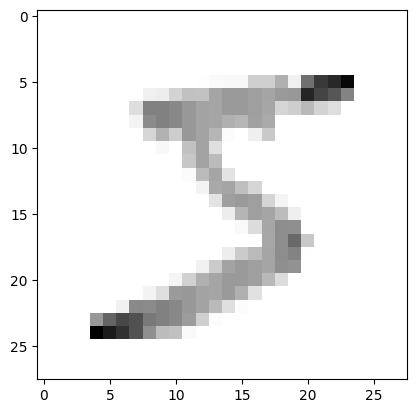

In [7]:
# display the first datapoint as a 2D image
# note that the number corresponds to the intensity of each pixel
# chossing binary for cmap to get a black-and-white image
# see https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.imshow(x_train[0], cmap = 'binary')
plt.show()

## Linear-style neural network

### Add layers of neurons and choose your preferred activation function 
See https://keras.io/api/layers/activations/ for all available activation functions.

In [8]:
model_1D = tf.keras.models.Sequential()

# Flatten turns the input into 1D array (from [28,28] to [784])
model_1D.add(tf.keras.layers.Flatten())

no_neurons = 128

# add layers of neurons using relu activation function (stable/popular)
model_1D.add(tf.keras.layers.Dense(no_neurons, activation = tf.nn.relu))
model_1D.add(tf.keras.layers.Dense(no_neurons, activation = tf.nn.relu))

# the last layer can hold the digits 0 to 9 
last_layer = 10

# the second-to-last layer output is transformed to a probability distribution using softmax
model_1D.add(tf.keras.layers.Dense(last_layer, activation = tf.nn.softmax))

### Choose an optimiser, a loss function and metrics

In [9]:
model_1D.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

### Fit the model

Epochs represents the number of times the data is fed to the neural network or how many times the neural network has seen the the data.

In [10]:
output_1D = model_1D.fit(x_train, y_train, epochs = 3, validation_data = (x_test,y_test))

Epoch 1/3
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2612 - accuracy: 0.9233 - val_loss: 0.1508 - val_accuracy: 0.9531
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1106 - accuracy: 0.9657 - val_loss: 0.0996 - val_accuracy: 0.9692
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0752 - accuracy: 0.9764 - val_loss: 0.0916 - val_accuracy: 0.9720


### Plot the learning curves
The following curves are plotted for 3 epochs (3 datapoints):     
- Learning curve: accuracy rate VS number of epochs     
- Loss curve: loss rate VS number of epochs

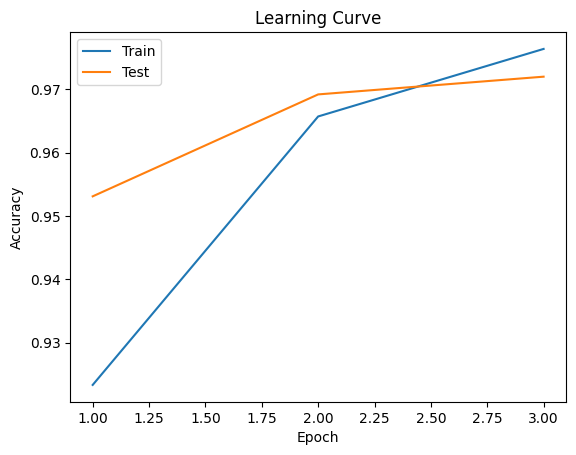

In [11]:
x_values = np.arange(3)+1
plt.plot(x_values, output_1D.history['accuracy'], label = 'Train')
plt.plot(x_values, output_1D.history['val_accuracy'], label = 'Test') # accuracy of validation_data or test set
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

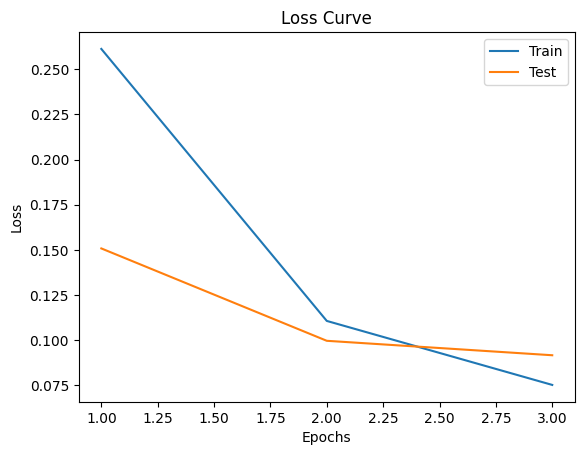

In [12]:
plt.plot(x_values, output_1D.history['loss'], label = 'Train')
plt.plot(x_values, output_1D.history['val_loss'], label = 'Test') # loss of validation_data or test set
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

The model can also be evaluated by using the`evaluate`function, which returns the loss and metrics (in this cse, the accuracy) of the test set.

In [13]:
val_loss, val_acc = model_1D.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0916 - accuracy: 0.9720
0.09163708239793777 0.972000002861023


### Model testing

313/313 [==============================] - 1s 3ms/step
Predicted value: 6
True value: 6
Output: [5.0138377e-05 9.3803021e-07 1.1606171e-06 4.5632114e-06 6.7448353e-05
 1.6250071e-04 9.9971253e-01 1.8092845e-09 4.0829121e-07 1.6920272e-07]


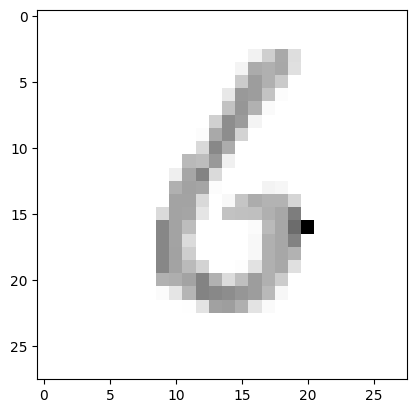

In [14]:
predictions = model_1D.predict(x_test)

# select an index of your choice
index = 50

print('Predicted value:', np.argmax(predictions[index]))
print('True value:', y_test[index])
print('Output:', predictions[index])
plt.imshow(x_test[index], cmap = plt.cm.binary)
plt.show()

### Save the model

The model can be saved as a folder in your current directory as

    model.save("model_name")

To load the saved model:

    new_model = tf.keras.models.load_model("model_name")
    
We are not saving any models in this notebook.